Load the dataset

Columns: StudentID, Name, Math, Science, English, Attendance

You can generate synthetic data or use a CSV.

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('students.csv')

Add Calculated Columns

Total = Math + Science + English

Average = Total / 3

Grade based on average.

In [4]:
df['Total'] = df['Math'] + df['Science'] + df['English']

In [5]:
df['Average'] = df['Total'] / 3

In [7]:
df['Average']

0     85.000000
1     82.000000
2     85.333333
3     68.333333
4     91.333333
5     78.333333
6     95.666667
7     71.333333
8     85.000000
9     91.666667
10    77.333333
11    85.666667
12    89.666667
13    80.666667
14    80.666667
15    92.666667
16    73.666667
17    88.333333
18    71.000000
19    89.333333
Name: Average, dtype: float64

In [8]:
def grades(avg):
    if avg >= 90:
        return 'A'
    elif avg>=75 and avg<90:
        return 'B'
    elif avg >=36 and avg<75:
        return 'C'
    else:
        return 'Fail'

In [14]:
df['Grades'] = df['Average'].apply(grades)

Ranking

Rank students by total score.

Identify top 5 and bottom 5 performers.

In [18]:
df['Rank'] = df['Total'].rank(method='min',ascending=False)

In [23]:
top_5 = df['Rank']<=5

In [26]:
df[top_5]

,StudentID,Name,Math,Science,English,Attendance,Total,Average,Grades,Rank
4,1005,Arjun Patel,88,95,91,99,274,91.333333,A,4.0
6,1007,Reyansh Mehta,95,98,94,100,287,95.666667,A,1.0
9,1010,Ananya Sharma,91,94,90,97,275,91.666667,A,3.0
12,1013,Kiara Ali,90,87,92,98,269,89.666667,B,5.0
15,1016,Saanvi Kumar,94,91,93,99,278,92.666667,A,2.0


In [29]:
total_students = len(df)
bottom_5 = df[df['Rank'] > total_students-5]
bottom_5

,StudentID,Name,Math,Science,English,Attendance,Total,Average,Grades,Rank
3,1004,Vihaan Gupta,65,72,68,85,205,68.333333,C,20.0
7,1008,Krishna Yadav,68,75,71,88,214,71.333333,C,18.0
10,1011,Diya Verma,74,80,78,93,232,77.333333,B,16.0
16,1017,Kabir Dave,71,77,73,87,221,73.666667,C,17.0
18,1019,Ayaan Khan,69,74,70,86,213,71.000000,C,19.0


Filtering & Grouping

Group students by grade or performance level.

Filter students with low attendance or scores.

In [39]:
grades_group = df.groupby(['Grades'])

In [41]:
df

,StudentID,Name,Math,Science,English,Attendance,Total,Average,Grades,Rank
0,1001,Aarav Sharma,85,92,78,95,255,85.000000,B,10.0
1,1002,Vivaan Singh,76,88,82,91,246,82.000000,B,12.0
2,1003,Aditya Kumar,92,79,85,98,256,85.333333,B,9.0
3,1004,Vihaan Gupta,65,72,68,85,205,68.333333,C,20.0
4,1005,Arjun Patel,88,95,91,99,274,91.333333,A,4.0
5,1006,Sai Reddy,79,81,75,92,235,78.333333,B,15.0
6,1007,Reyansh Mehta,95,98,94,100,287,95.666667,A,1.0
7,1008,Krishna Yadav,68,75,71,88,214,71.333333,C,18.0
8,1009,Ishaan Jain,82,89,84,96,255,85.000000,B,10.0
9,1010,Ananya Sharma,91,94,90,97,275,91.666667,A,3.0


In [53]:
df[df['Attendance'] < 75]

,StudentID,Name,Math,Science,English,Attendance,Total,Average,Grades,Rank


Visualization (Optional but fun)

Bar chart of top performers.

Scatter plot of attendance vs average score.

In [58]:
top_5 = df[df['Rank'] <= 5]

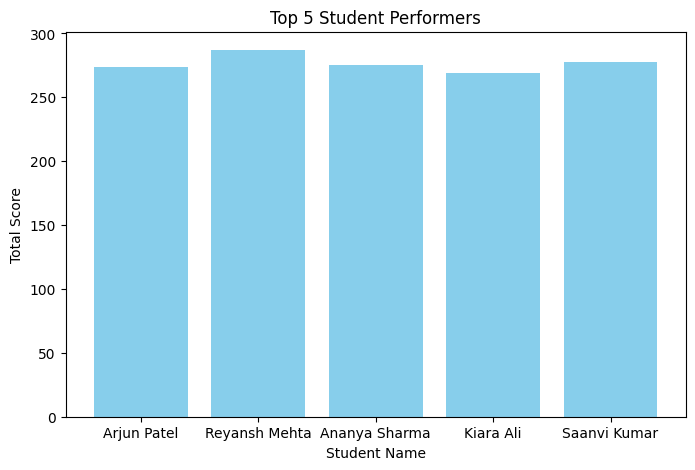

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top_5['Name'], top_5['Total'], color='skyblue')
plt.title('Top 5 Student Performers')
plt.xlabel('Student Name')
plt.ylabel('Total Score')
plt.show()


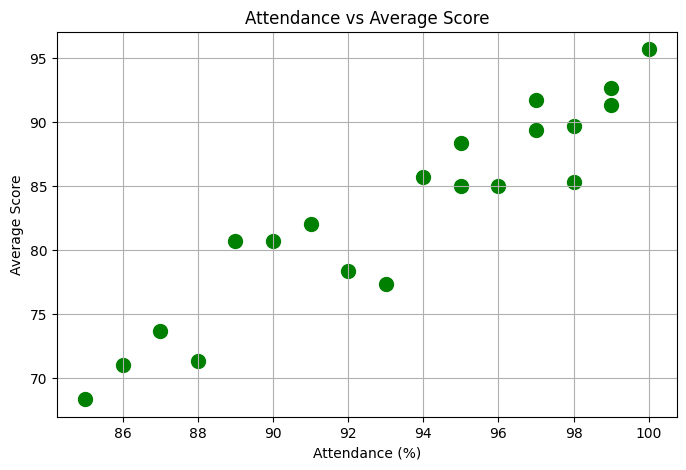

In [63]:
plt.figure(figsize=(8,5))
plt.scatter(df['Attendance'], df['Average'], color='green', s=100)  # s = size of points
plt.title('Attendance vs Average Score')
plt.xlabel('Attendance (%)')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()


Advanced Analysis

Correlation between subjects.

Identify subject-wise strength and weakness patterns. 


In [68]:
correlation = df.iloc[:,2:5].corr()
correlation

,Math,Science,English
Math,1.000000,0.754865,0.925555
Science,0.754865,1.000000,0.807511
English,0.925555,0.807511,1.000000


In [70]:
df['Average']

0     85.000000
1     82.000000
2     85.333333
3     68.333333
4     91.333333
5     78.333333
6     95.666667
7     71.333333
8     85.000000
9     91.666667
10    77.333333
11    85.666667
12    89.666667
13    80.666667
14    80.666667
15    92.666667
16    73.666667
17    88.333333
18    71.000000
19    89.333333
Name: Average, dtype: float64

In [74]:
strongest = df['Average'].idxmax()
weakest = df['Average'].idxmin()

print(f"Best strength of class is {strongest}")
print(f"Worst strength of class is {weakest}")



Best strength of class is 6
Worst strength of class is 3


In [90]:
def strong_weak(row):
    best = row[['Math','Science','English']].idxmax()
    worst = row[['English','Math','Science']].idxmin()
    return pd.Series([best , worst] , index=['Strongest','Weakest'])

df[['Strongest', 'Weakest']] = df.apply(strong_weak, axis=1)

print("\nIndividual strengths and weaknesses:")
df[['Name', 'Strongest', 'Weakest']]


Individual strengths and weaknesses:


,Name,Strongest,Weakest
0,Aarav Sharma,Science,English
1,Vivaan Singh,Science,Math
2,Aditya Kumar,Math,Science
3,Vihaan Gupta,Science,Math
4,Arjun Patel,Science,Math
5,Sai Reddy,Science,English
6,Reyansh Mehta,Science,English
7,Krishna Yadav,Science,Math
8,Ishaan Jain,Science,Math
9,Ananya Sharma,Science,English
